In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [4]:
walk_df = pd.read_csv('WALKING_29-03-19_03:38:30_500cm.csv').sort_values('Timestamp')

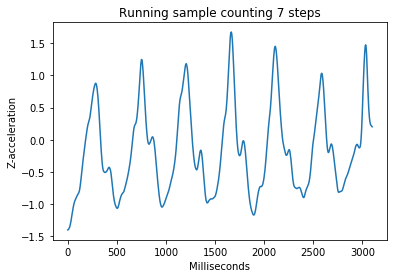

In [23]:
def calculate_steps(df):
    acc_z = df['Accel_z'].values - 9.8
#     filt = signal.butter(9, 0.01)
#     clean = signal.lfilter(*filt, acc_z)
    clean = low_pass(acc_z, 100)
    return (clean, signal.find_peaks(clean, height=10)[0].shape[0])
    

def zero_crossings(arr):
    return np.where(np.diff(np.signbit(arr)))[0].shape[0]

def low_pass(arr, smoothing):
    v = arr[0]
    for i in range(1, len(arr)):
        curr = arr[i]
        v += (curr - v) / smoothing
        arr[i] = v
    return arr
        
steps = calculate_steps(walk_df)
plt.plot(steps[0])
plt.title('Running sample counting 7 steps')
plt.xlabel('Milliseconds')
plt.ylabel('Z-acceleration')

plt.show()